In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Description:
In this notebook, we acquire one year of flight traffic data for EGLL airport. The dataset is located in [Skywise Foundry](https://core.skywise.com/workspace/dataset/preview/ri.foundry.main.dataset.33e61269-87a3-45ae-aaf2-af6dfdc18761/master). The output of this data wrangling is the removal of features not needed for the machine learning, feature engineering of new variables (eg: `hourofday`),removal of duplicates. Some basic Exploratory Data Analytics is also done.

In [2]:
import pandas as pd
import numpy as np
#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
np.set_printoptions(precision=8, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.8g" % x))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/2016_EGLL_Testdata_raw.csv',parse_dates = ['Landing_Time'], infer_datetime_format = True)
df['hourofday'] = df.Landing_Time.dt.hour
df.head()

,Landing_WinAndGust_Cross_Class,Landing_WindAndGust_Front_Class,Landing_WindAndGust_Cross_kt,Landing_WindAndGust_Front_kt,Landing_Wind_Cross_kt,Landing_Wind_Front_kt,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RWY_Mag_Bearing,Landing_Visibilty_Class_RVR,...,sky_level_4_coverage,sky_level_1_alt_ft,sky_level_2_alt_ft,sky_level_3_alt_ft,sky_level_4_alt_ft,present_weather_codes,present_weather_codes_meaning,AreaCode,RunwayTrueTrack,hourofday
0,(a) 5kt or less,(k) 0/+5kt,-0.693590,1.875882,-0.693590,1.875882,2.0,2.0,90.3,VMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,89.713523,6
1,(a) 5kt or less,(l) +5/+10kt,3.032626,8.473676,3.032626,8.473676,9.0,9.0,90.3,VMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,89.713523,13
2,(a) 5kt or less,(l) +5/+10kt,4.952684,8.687400,4.952684,8.687400,10.0,10.0,90.3,VMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,89.713523,12
3,(b) 5/10kt,(l) +5/+10kt,-9.243315,7.652524,-9.243315,7.652524,12.0,12.0,270.4,VMC,...,NaN,800.0,NaN,NaN,NaN,NaN,NaN,EUR,269.713523,17
4,(a) 5kt or less,(n) +15/+20kt,-3.067543,16.720950,-3.067543,16.720950,17.0,17.0,270.4,VMC,...,NaN,800.0,NaN,NaN,NaN,NaN,NaN,EUR,269.713523,18


In [5]:
df.dropna(axis=1, how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221069 entries, 0 to 221068
Data columns (total 58 columns):
Landing_WinAndGust_Cross_Class     220349 non-null object
Landing_WindAndGust_Front_Class    220349 non-null object
Landing_WindAndGust_Cross_kt       220349 non-null float64
Landing_WindAndGust_Front_kt       220349 non-null float64
Landing_Wind_Cross_kt              220349 non-null float64
Landing_Wind_Front_kt              220349 non-null float64
Wind_Speed_kt                      221069 non-null float64
Wind_And_Gust_kt                   221069 non-null float64
Landing_RWY_Mag_Bearing            221069 non-null float64
Landing_Visibilty_Class_RVR        221069 non-null object
Landing_Visibilty_Class            221069 non-null object
Landing_Coverage_Alt_ft            28078 non-null float64
Landing_RVR_or_Vis_Quality         221069 non-null int64
Landing_RVR_or_Vis_m               221069 non-null float64
RVR_Mean                           1844 non-null float64
METAR        

In [6]:
cols_of_interest = ['Landing_Time','hourofday','aircraft_registration','wind_direction_degrees','Wind_Speed_kt','Wind_And_Gust_kt',
                    'Landing_RVR_or_Vis_m','temperature_c','dew_point_c','relative_humidity','pressure_altimiter_in',
                    'RunwayTrueTrack','Landing_Visibilty_Class_RVR','present_weather_codes','Landing_RWY']
df = df[cols_of_interest]

In [7]:
df.head()

,Landing_Time,hourofday,aircraft_registration,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,Landing_Visibilty_Class_RVR,present_weather_codes,Landing_RWY
0,2016-01-01 06:15:58,6,GVIIC,70.0,2.0,2.0,8000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
1,2016-01-01 13:19:52,13,TCJJS,110.0,9.0,9.0,10000.0,7.0,4.0,81.20,30.03,89.713523,VMC,NaN,RW09L
2,2016-01-01 12:01:11,12,DAIZU,120.0,10.0,10.0,10000.0,7.0,4.0,81.20,30.09,89.713523,VMC,NaN,RW09L
3,2016-01-02 17:22:49,17,GEUPX,220.0,12.0,12.0,7000.0,11.0,10.0,93.55,29.38,269.713523,VMC,NaN,RW27L
4,2016-01-02 18:20:40,18,ECLXQ,260.0,17.0,17.0,10000.0,11.0,9.0,87.47,29.41,269.713523,VMC,NaN,RW27L


In [8]:
print('No. of Unique Weather Codes:',df.present_weather_codes.nunique(),'\n')
print('Unique Weather Codes:',df.present_weather_codes.unique(),'\n')

No. of Unique Weather Codes: 49 

Unique Weather Codes: [nan 'VCFG' 'BR' '-RA' '-RADZ' 'TSRA' 'HZ' 'VCSH' '-SHRA' '-DZ' '-DZ BR' 'SHRA' 'MIFG' 'FG' 'RA' 'BR BCFG' 'PRFG VCFG' 'RADZ' 'VCTS -SHRA' 'VCTS' '-TSRA' '+SHRA' 'MIFG BR' 'FZFG' '-SN' '//////' '-SHRA VCTS' 'BR VCFG' 'BCFG' 'PRFG' '+RA' 'BR PRFG' 'SHRA VCTS' '-RADZ BR' '-SHRASN' 'RA HZ' '-SHRA TS' '-RA VCTS' 'TS' '-RADZ FG' 'DZ' '-RADZ HZ' 'VCTS VCSH' 'BR MIFG' '-DZ FG' '+RA VCTS' 'SHRA HZ' 'SG' 'BR VCTS' 'RADZ FG'] 



In [9]:
print('No. of Unique Visibility Classes:',df.Landing_Visibilty_Class_RVR.nunique())
print('Unique Visibility Classes:',df.Landing_Visibilty_Class_RVR.unique())

No. of Unique Visibility Classes: 5
Unique Visibility Classes: ['VMC' 'Marginal VMC' 'CAT1' 'CAT2' 'CAT3']


In [10]:
print('No. of Unique Aircraft Registrations landing in EGLL from 01-01-2016 to 31-12-2016:',df.aircraft_registration.nunique())

No. of Unique Aircraft Registrations landing in EGLL from 01-01-2016 to 31-12-2016: 3511


In [11]:
# Check for Duplicates in the Dataframe
df[df.duplicated(keep='first',subset=['Landing_Time','aircraft_registration'])]

,Landing_Time,hourofday,aircraft_registration,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,Landing_Visibilty_Class_RVR,present_weather_codes,Landing_RWY
1627,2016-05-31 14:41:42,14,IBIXL,360.0,9.0,9.0,10000.0,12.0,10.0,87.56,30.03,269.713523,VMC,NaN,RW27L
2724,2016-04-30 16:02:36,16,GEUXL,360.0,8.0,8.0,10000.0,11.0,0.0,46.59,30.21,269.713523,VMC,VCSH,RW27R
3215,2016-09-30 18:46:00,18,GEUUT,210.0,6.0,6.0,10000.0,13.0,10.0,81.99,29.85,269.713523,VMC,NaN,RW27R
4353,2016-09-30 06:48:10,6,GEUPC,230.0,7.0,7.0,10000.0,11.0,9.0,87.47,29.91,269.713523,VMC,NaN,RW27L
7032,2016-01-31 17:17:31,17,GZBKE,250.0,16.0,16.0,10000.0,13.0,10.0,81.99,29.77,269.713523,VMC,NaN,RW27L
7768,2016-09-30 17:54:11,17,DAIZV,240.0,8.0,8.0,10000.0,14.0,10.0,76.82,29.85,269.713523,VMC,-RA,RW27R
14258,2016-06-30 13:14:47,13,GEUUX,230.0,13.0,13.0,10000.0,19.0,12.0,63.82,29.83,269.713523,VMC,NaN,RW27R
15237,2016-04-30 21:37:20,21,EIDSE,270.0,6.0,6.0,10000.0,8.0,2.0,65.83,30.33,269.713523,VMC,NaN,RW27R
17600,2016-05-31 09:06:02,9,GEUYU,350.0,10.0,10.0,10000.0,11.0,10.0,93.55,29.97,269.713523,VMC,-RA,RW27R
19672,2016-03-31 19:58:23,19,PHBGG,120.0,7.0,7.0,10000.0,7.0,2.0,70.48,30.06,269.713523,VMC,NaN,RW27R


In [12]:
# Grouping and sorting by ICAO values and postime
df.drop_duplicates(keep='first',subset=['Landing_Time','aircraft_registration'], inplace=True)
df.sort_values(by=['Landing_Time'], inplace = True)
df.to_csv('data/2016_EGLL_Testdata_cleaned.csv', index = False)

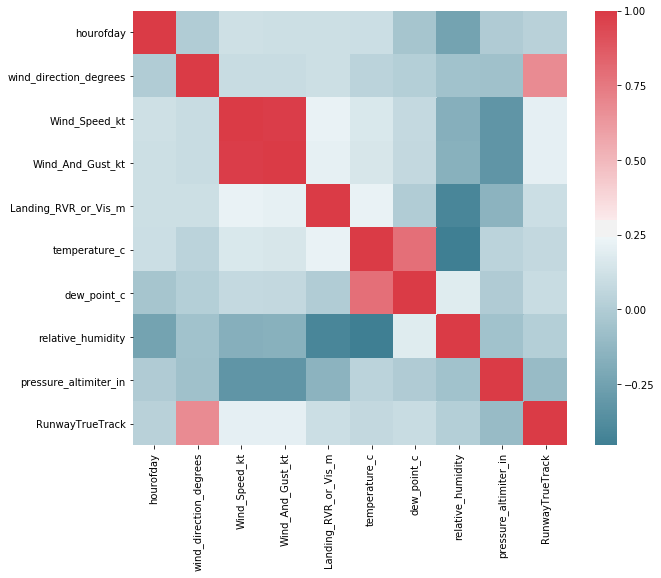

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

### Notes:
`numerical_cols_of_interest = ['hourofday','aircraft_registration','wind_direction_degrees','Wind_speed_kt', 'Wind_And_Gust_kt','Landing_RVR_or_Vis_m','temperature_c','dew_point_c','relative_humidity','pressure_altimeter_in',
'RunwayTrueTrack']`

`categorical_cols_of_interest = ['Landing_Visibilty_Class_RVR','present_weather_codes']`


* **Landing_RWY** is our main column to classify and predict.
* Low Quality Data, i.e where Landing_RWY_Quality > 5 (is bad) has been removed in the raw dataset itself.
* Landing time is used to sort the dataframe.
* Many columns such as _Landing_Coverage_Alt_ft_, _Landing_RVR_or_Vis_Quality_ and manually calculated columns like *Landing_RWY_Quality, Dist_To_Threshold_m, Mean_DeltaTrack, Nb_Snapshot_InRWY, Mean_ProjDistance, Nb_Pt_in_Last_min*  have been dropped. 